In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import csv

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [3]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Central')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:52:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 01:53:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,2011-12-31 01:54:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,2011-12-31 01:55:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,2011-12-31 01:56:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [4]:
#Convert Timestamp into separate Date and Time
#temp = pd.DatetimeIndex(df['Timestamp']) #Gather all datetime objects
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:52:00
1,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:53:00
2,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:54:00
3,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:55:00
4,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:56:00


In [5]:
price=df['Weighted_Price']

In [6]:
min_periods = 1440

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
3161052,16167.98,16179.65,16154.59,16154.60,2.887541,46660.414604,16159.221330,2018-01-07,17:56:00,16518.439595,11660.722878,307.287029
3161053,16178.07,16178.07,16142.13,16176.43,1.014694,16402.389804,16164.858364,2018-01-07,17:57:00,16517.763921,11649.592195,306.993710
3161054,16131.19,16176.10,16114.30,16114.30,16.897225,272434.236630,16123.016402,2018-01-07,17:58:00,16517.056264,11639.510931,306.728045
3161055,16169.82,16189.43,16114.49,16124.02,6.384757,103222.040090,16166.949978,2018-01-07,17:59:00,16516.385962,11628.481450,306.437393
3161056,16173.98,16176.96,16102.05,16166.78,25.633791,413278.394640,16122.406640,2018-01-07,18:00:00,16515.680741,11618.503085,306.174440


In [7]:
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('10/08/17', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('01/07/18', '%x'))].index[0]
df_1= df.loc[index_1:index_2]
#df_1= df.loc[index_1:,]
df_1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
3028876,4414.04,4419.99,4412.00,4412.00,6.148882,27146.562418,4414.878009,2017-10-08,00:00:00,4365.719054,1602.287886,42.223993
3028877,4408.77,4419.99,4408.77,4419.95,4.398062,19421.562294,4415.936861,2017-10-08,00:01:00,4365.749482,1603.061981,42.244392
3028878,4416.91,4416.91,4416.91,4416.91,0.008181,36.135757,4416.910000,2017-10-08,00:02:00,4365.780525,1603.865271,42.265561
3028879,4416.91,4419.93,4416.91,4419.93,1.973078,8720.397601,4419.692771,2017-10-08,00:03:00,4365.811215,1604.741869,42.288661
3028880,4417.31,4419.99,4417.31,4419.99,1.995281,8818.748890,4419.803325,2017-10-08,00:04:00,4365.850221,1605.648376,42.312550


In [8]:
df_2=df_1.groupby(df_1.Date).mean()
df_2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2017-10-08,4530.808875,4533.114493,4527.687687,4530.968715,6.875331,31149.740271,4530.875544,4438.966860,2170.294692,57.192287
2017-10-09,4685.317590,4687.799938,4682.211250,4685.301208,9.267629,43539.739175,4685.032849,4599.187565,2172.667766,57.254823
2017-10-10,4798.084181,4800.383542,4794.935861,4797.934076,8.189953,39302.796810,4797.619695,4773.505996,2222.922456,58.579150
2017-10-11,4808.158146,4810.427118,4804.906736,4808.132278,7.173288,34465.256993,4807.627522,4790.144911,1694.123545,44.644075
2017-10-12,5272.119840,5277.129382,5266.725118,5272.619590,17.039488,90202.277584,5271.984547,4988.165580,5607.357240,147.766838


In [9]:
marker=[]
change=[]
for i in range(len(df_2)-1):
    dailydiff=df_2['Average'].iloc[i+1]-df_2['Average'].iloc[i]
    change.append(dailydiff)
    if abs(change[i]) > 2*(df_2['SD'].iloc[i]):
        marker.append(df_2.index[i])   

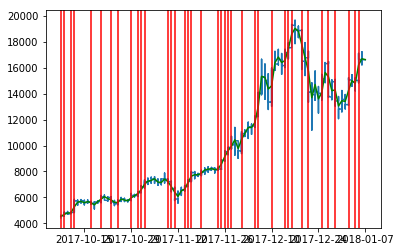

In [10]:
plt.plot(df_1.Date,df_1.Weighted_Price)
plt.plot(df_2.index,df_2.Weighted_Price,c='g')
for xc in marker:
    plt.axvline(x=xc,c='r')
plt.show()

In [11]:
df = pd.DataFrame({'Date':marker})
df.to_csv('marker.csv',index=False)